In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [271]:
# 1. Load dataset
df = pd.read_csv('BigBasket Products.csv')

In [272]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


# --> Description

In [273]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


# --> Information

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


# --> Check rows and columns

In [275]:
df.shape

(27555, 10)

# --> Columns 

In [276]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

# --> Max & Min sold Products

In [277]:
max_sale = df.loc[df['sale_price'].idxmax()]

In [278]:
max_sale

index                                                        1250
product                                                 Beard Kit
category                                         Beauty & Hygiene
sub_category                                       Men's Grooming
brand                                                  Uncle Tony
sale_price                                               112475.0
market_price                                               3300.0
type                                           Combos & Gift Sets
rating                                                        NaN
description     The combination of a beard oil, a beard wash, ...
Name: 1249, dtype: object

In [279]:
min_sale = df.loc[df['sale_price'].idxmin()]

In [280]:
min_sale

index                                                       26977
product                                              Curry Leaves
category                                      Fruits & Vegetables
sub_category                                   Herbs & Seasonings
brand                                                      Fresho
sale_price                                                   2.45
market_price                                                 15.0
type                                        Indian & Exotic Herbs
rating                                                        NaN
description     With dark green and glossy appearance, curry l...
Name: 26976, dtype: object

# --> Check null values

In [281]:
df.isna().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
dtype: int64

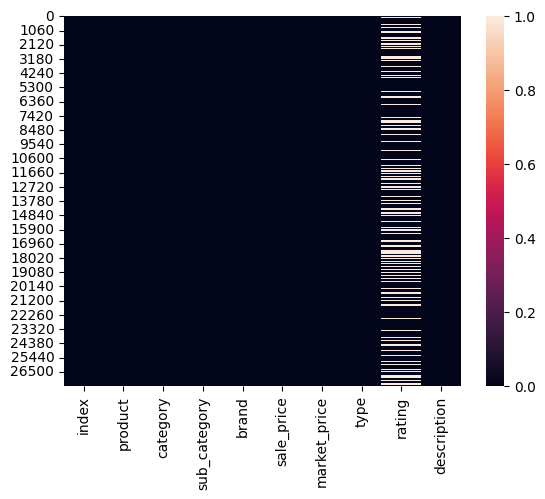

In [282]:
sns.heatmap(df.isna())
plt.show()

In [283]:
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [284]:
df['rating'].isna().sum()

np.int64(0)

# --> Drop two columns

In [285]:
df.drop(columns=['index','description'],inplace=True)

In [286]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


# --> Check Outliers

<Axes: xlabel='market_price'>

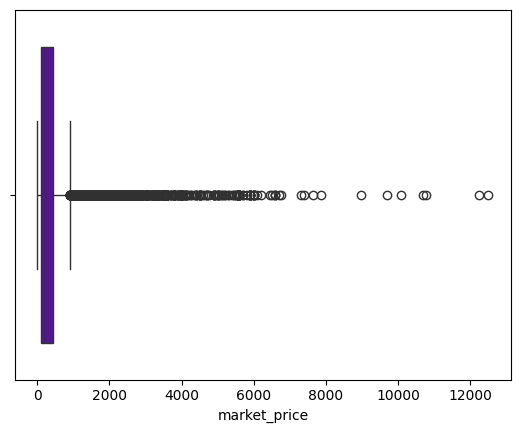

In [287]:
sns.boxplot(df['market_price'],orient='h')

In [288]:
Q1 = df['market_price'].quantile(0.25)
Q3 = df['market_price'].quantile(0.75)
Q1,Q3

(np.float64(100.0), np.float64(425.0))

In [289]:
IQR = Q3 - Q1
IQR

np.float64(325.0)

In [290]:
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
LL,UL

(np.float64(-387.5), np.float64(912.5))

In [291]:
df[(df['market_price'] > UL) | (df['market_price'] < LL)].head(4)

,product,category,sub_category,brand,sale_price,market_price,type,rating
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.500000
34,Pet Solitaire Container Set - Silver,"Kitchen, Garden & Pets",Storage & Accessories,Steelo,499.00,969.0,Containers Sets,3.900000
96,Hair Remover Spray - Foam Lemon,Beauty & Hygiene,Feminine Hygiene,Dimples,1200.00,1200.0,Hair Removal,3.943295
99,"Wonder Diaper Pants - Xtra Large, 12-17 Kg",Baby Care,Diapers & Wipes,Huggies,1266.38,1398.0,Diapers,4.000000


In [292]:
df = df[(df['market_price'] >= LL) & (df['market_price'] <= UL)]

In [293]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


In [305]:
print('new_data: ', len(df))

new_data:  5


<Axes: ylabel='market_price'>

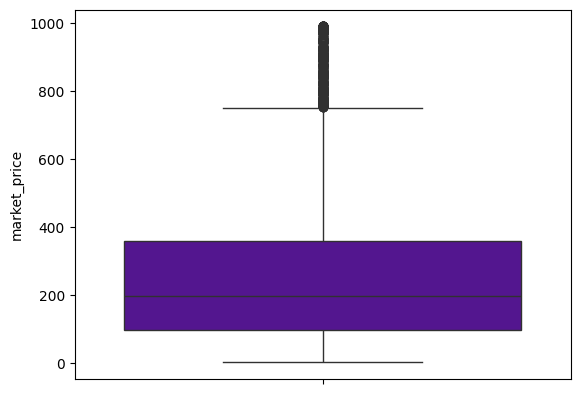

In [295]:
sns.boxplot(new_data['market_price'])

# --> sale Price

<Axes: ylabel='sale_price'>

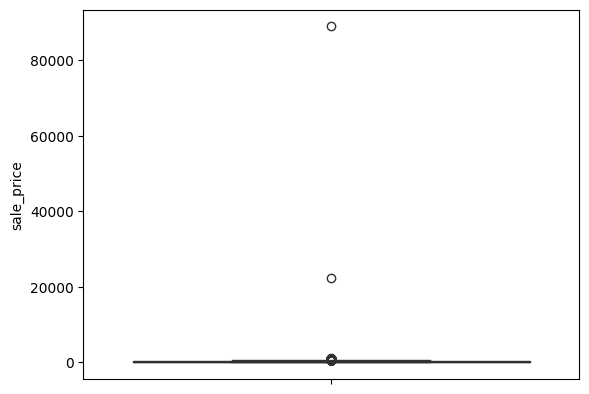

In [296]:
sns.boxplot(df['sale_price'])

In [298]:
Q1 = df['sale_price'].quantile(0.25)
Q3 = df['sale_price'].quantile(0.75)
Q1,Q3

(np.float64(89.0), np.float64(300.0))

In [299]:
IQR = Q3 - Q1
IQR

np.float64(211.0)

In [300]:
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
UL,LL

(np.float64(616.5), np.float64(-227.5))

In [301]:
df[(df['sale_price'] > UL) | (df['sale_price'] < LL)].head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
25,Insulated Hot Fresh Casserole For Roti/Chapati...,"Kitchen, Garden & Pets",Flask & Casserole,Cello,659.0,895.0,Casserole,3.300000
47,Colour Catcher Sheets,Cleaning & Household,All Purpose Cleaners,Dylon,799.0,799.0,Imported Cleaners,4.000000
51,Peach Syrup,Gourmet & World Food,Drinks & Beverages,Pekers,850.0,850.0,Gourmet Juices & Drinks,4.200000
69,"Padded Harness - 3/4 inch, Grey Colour","Kitchen, Garden & Pets",Pet Food & Accessories,Glenand,840.0,840.0,Pet Collars & Leashes,3.943295
86,"Cheese - Feta Greek, Block",Gourmet & World Food,Dairy & Cheese,Fresho Signature,695.7,773.0,International Cheese,3.943295


In [302]:
df = df[(df['sale_price'] <= UL) & (df['sale_price'] >= LL)].head()
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4


<Axes: ylabel='sale_price'>

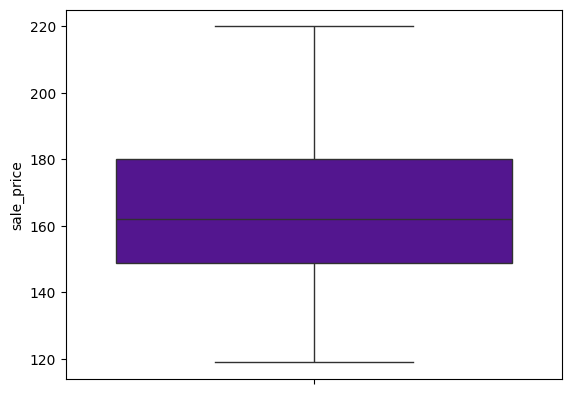

In [303]:
sns.boxplot(df['sale_price'])

In [304]:
print('Old_Data:', len(df))
print('New_Data:', len(df))

Old_Data: 5
New_Data: 5


# --> Add Discount Column

In [306]:
df['discount'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100

#top_discounted = df.sort_values(by='discount', ascending=False)

In [307]:
df['discount'] = df['market_price'] - df['sale_price']

In [308]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.0
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.0
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,131.0
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,27.0
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.0


# --> After add Discount Column check describe

In [309]:
df.describe()

,sale_price,market_price,rating,discount
count,5.000000,5.000000,5.000000,5.00000
mean,166.000000,197.600000,3.580000,31.60000
std,37.503333,36.370318,0.810555,56.78292
min,119.000000,162.000000,2.300000,0.00000
25%,149.000000,176.000000,3.400000,0.00000
50%,162.000000,180.000000,3.700000,0.00000
75%,180.000000,220.000000,4.100000,27.00000
max,220.000000,250.000000,4.400000,131.00000


# --> Check Duplicated values

In [310]:
df.duplicated().sum()

np.int64(0)

# --> Drop Nan Value

In [319]:
df = df.dropna()

# --> Correlation

In [311]:
df.corr(numeric_only= True)

,sale_price,market_price,rating,discount
sale_price,1.000000,-0.181451,0.109380,-0.776690
market_price,-0.181451,1.000000,-0.059701,0.760357
rating,0.109380,-0.059701,1.000000,-0.110482
discount,-0.776690,0.760357,-0.110482,1.000000


<Axes: >

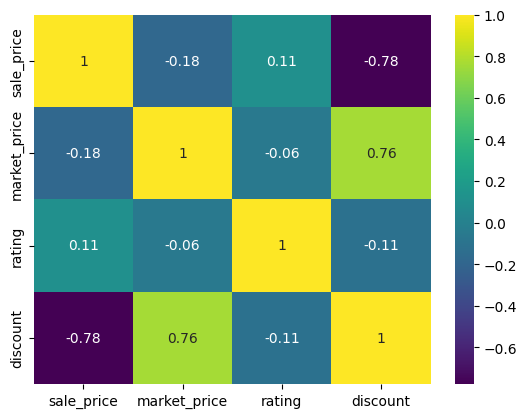

In [312]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

# --> Create Visualizations

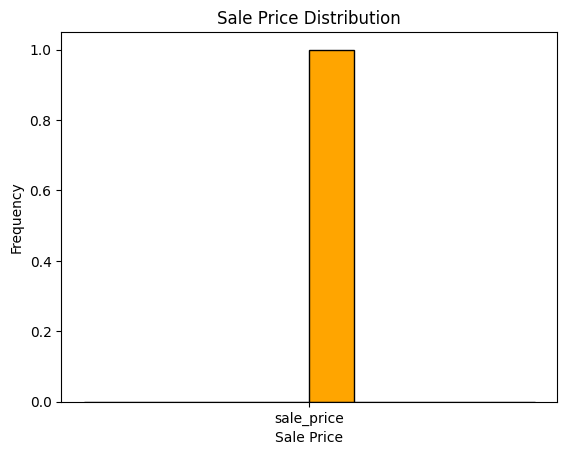

In [313]:
plt.hist('sale_price', bins=10, color='orange', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.show()

## Distribution of Discounts

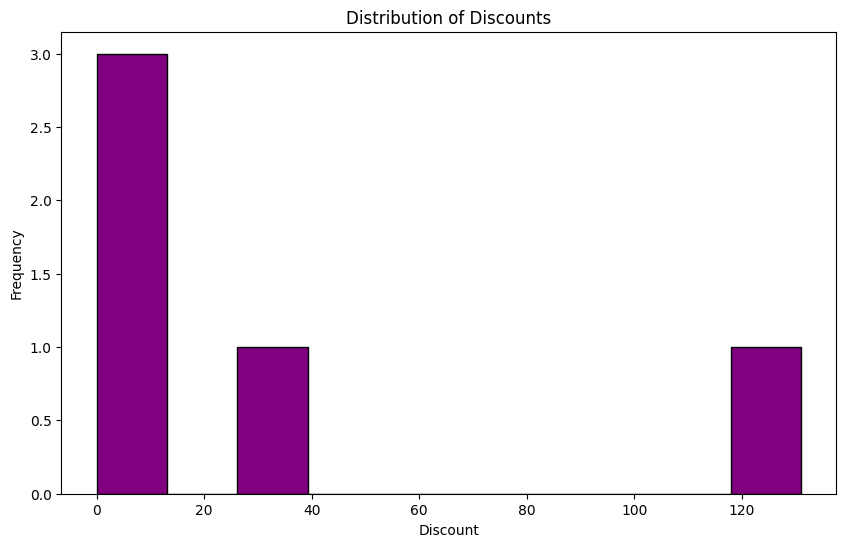

In [314]:
plt.figure(figsize=(10, 6))
plt.hist(df['discount'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


## Category-wise Sales

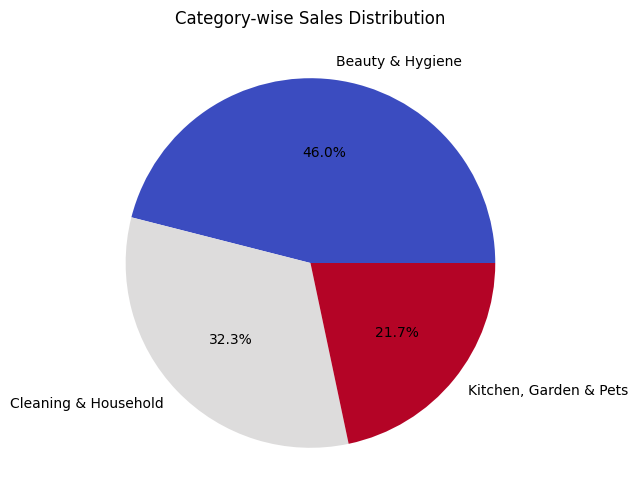

In [315]:
plt.figure(figsize=(6, 6))
df.groupby("category")["sale_price"].sum().plot.pie(autopct='%1.1f%%', cmap='coolwarm')
plt.title("Category-wise Sales Distribution")
plt.ylabel("")
plt.show()


## Average Rating by Brand

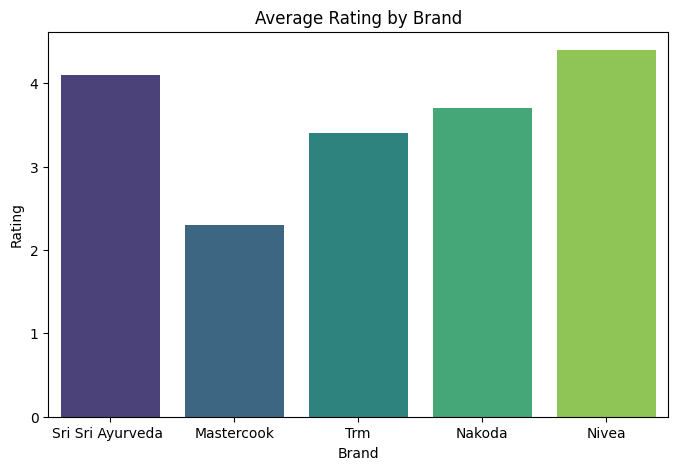

In [316]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df.head(10)["brand"], y=df["rating"], palette="viridis")
plt.title("Average Rating by Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.show()

## Discount Distribution By Frequency

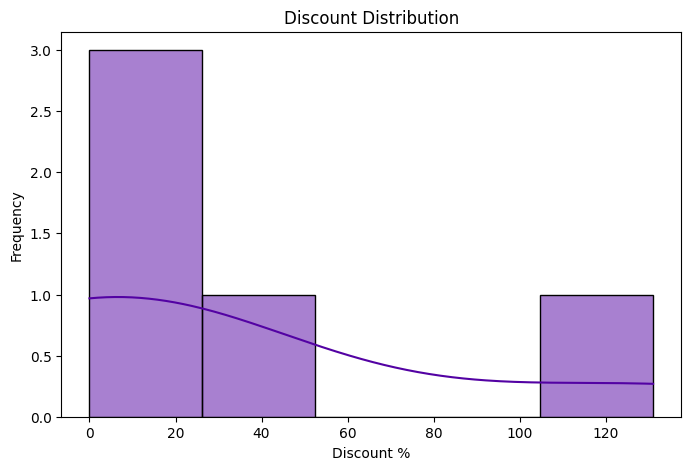

In [317]:
plt.figure(figsize=(8, 5))
sns.histplot(df["discount"], bins=5, kde=True)
plt.title("Discount Distribution")
plt.xlabel("Discount %")
plt.ylabel("Frequency")
plt.show()

# --> Pair Plot

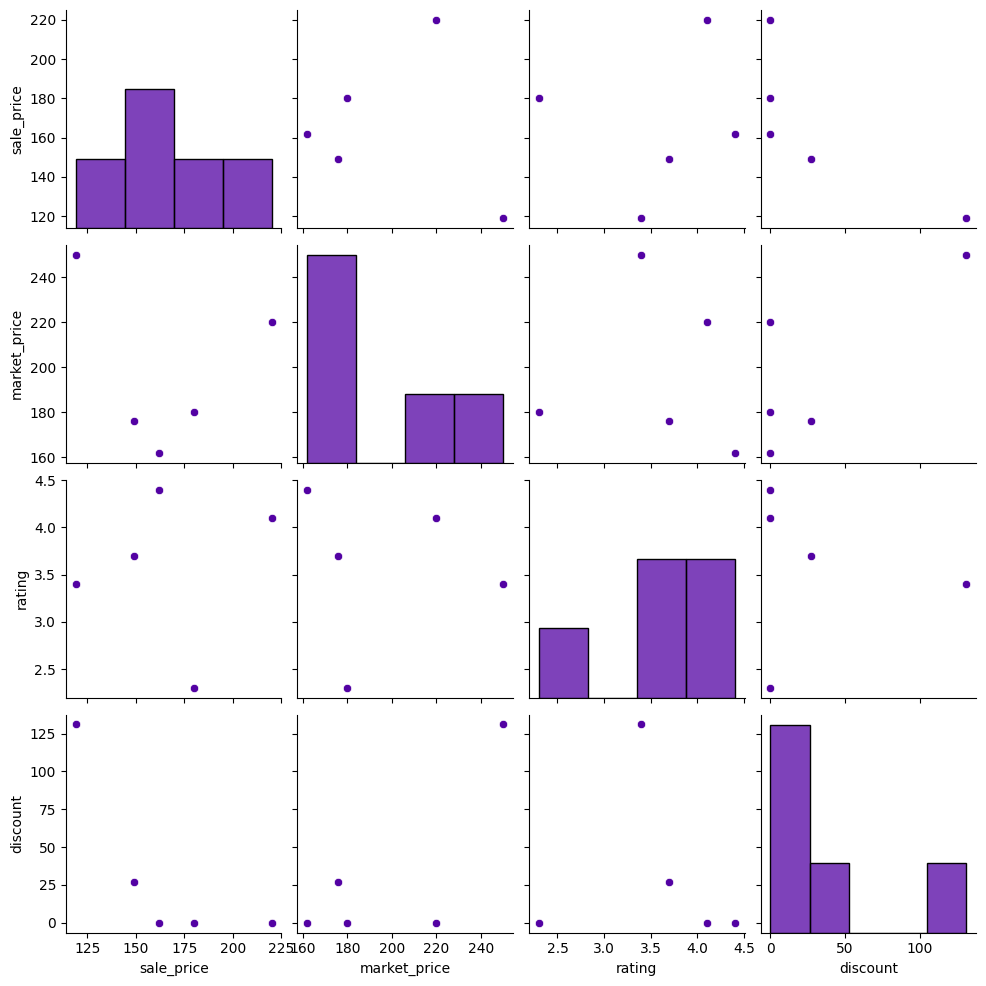

In [318]:
sns.pairplot( df , palette='pastel')
plt.show()

# --> Average  Sales 

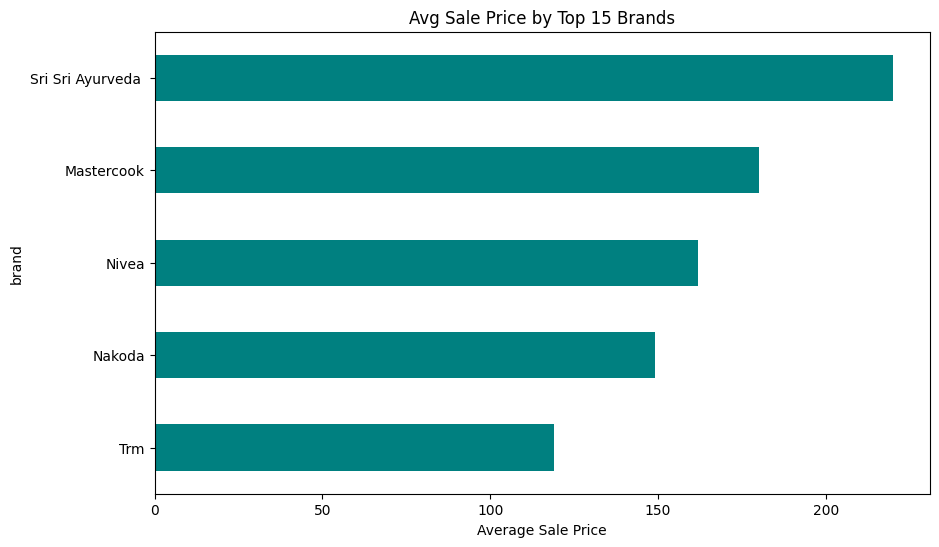

In [321]:
top_brands = df['brand'].value_counts().index[:15]
plt.figure(figsize=(10,6))
df[df['brand'].isin(top_brands)].groupby('brand')['sale_price'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Avg Sale Price by Top 15 Brands')
plt.xlabel('Average Sale Price')
plt.show()

# --> Product Rating

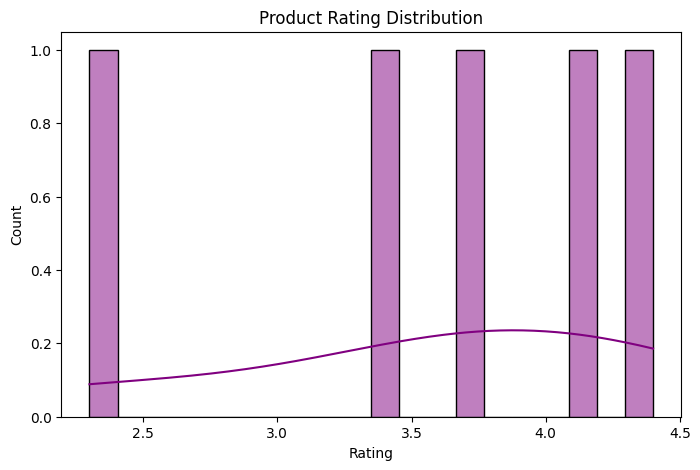

In [322]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color='purple')
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.show()

# --> Top Categories

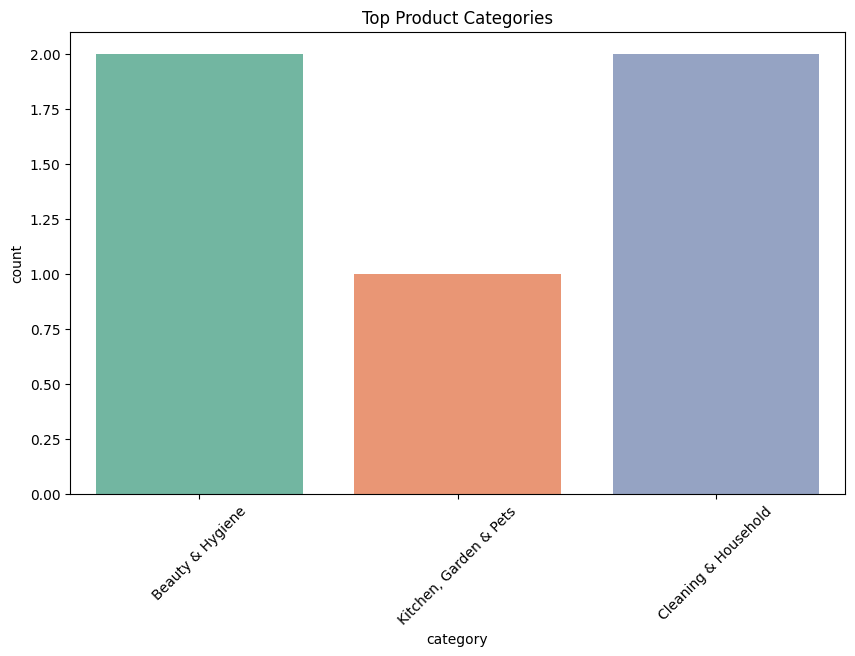

In [324]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', palette='Set2')
plt.title('Top Product Categories')
plt.xticks(rotation=45)
plt.show()

# --> Top Sub-Categories

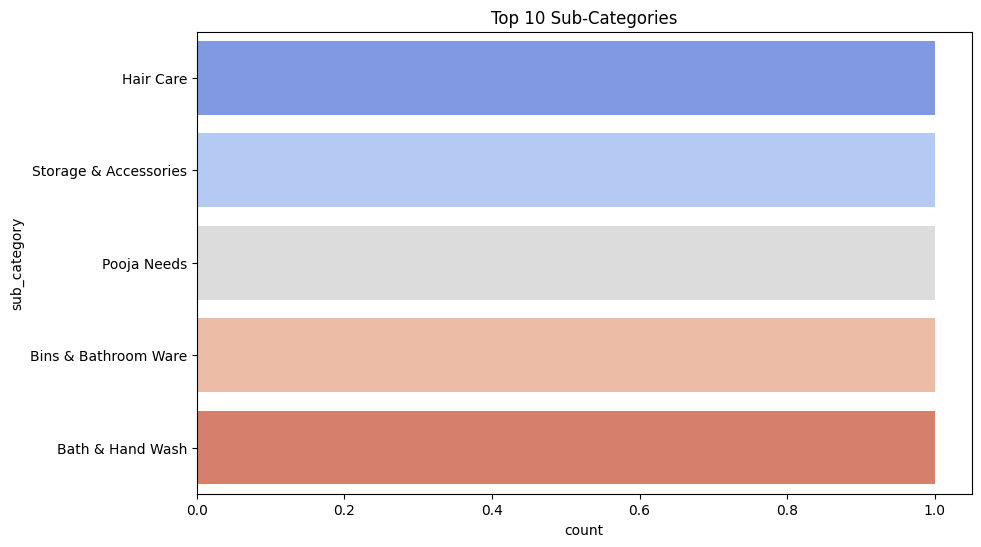

In [325]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='sub_category', order=df['sub_category'].value_counts().index[:10], palette='coolwarm')
plt.title('Top 10 Sub-Categories')
plt.show()

# --> Sale vs Market Price

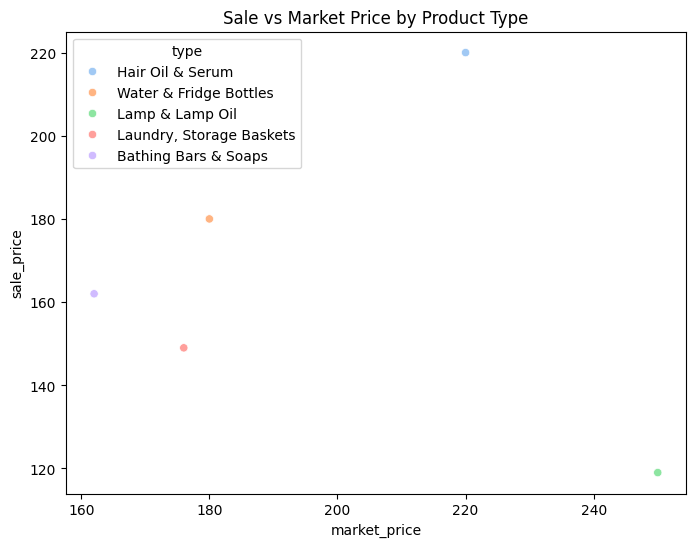

In [328]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='market_price', y='sale_price', hue='type', palette='pastel')
plt.title('Sale vs Market Price by Product Type')
plt.show()

# 📈Conclusion

# --> Customer Preferences Identified:
#  -> The analysis helped identify the most preferred product categories, such as Fruits & Vegetables, Dairy, and Beverages, which consistently showed high order volumes and user engagement.

# --> Sales and Demand Trends:
#  -> Monthly and seasonal trends revealed that certain product categories peak during specific months, indicating that consumer buying behavior is influenced by festivals, weather, and availability.

# --> Product Performance Insight:
#  -> Several underperforming products were identified through low sales and high return rates. This information can guide the platform to consider removing or optimizing such listings.

# --> Inventory & Stock Management:
#  -> The analysis supports better inventory planning by highlighting fast-moving items and forecasting demand, helping Big Basket avoid both overstock and stockouts.

# --> Business Recommendations:
# -> Based on the data, Big Basket can enhance marketing strategies by targeting high-demand products, running seasonal promotions, and personalizing product recommendations based on user behavior.